In [70]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [ ]:
#Importing imputed dataset
diabetes = pd.read_csv('/content/drive/MyDrive/data/Imputed Dataset.csv', index_col=0)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.903553,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.314661,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.542781,268.507178,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0


## Logistic Regression

In [ ]:
#Defining variables
X = diabetes[diabetes.columns[:-1]]
y = diabetes['Outcome']

In [ ]:
#Importing logistic regression library
from sklearn.linear_model import LogisticRegression

#Importing library for train and test set
from sklearn.model_selection import train_test_split

#Defining train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0, stratify = y)

In [ ]:
#Standardizing train and test split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Represent model
diabetes_logit = LogisticRegression(solver='lbfgs', random_state=0, max_iter=10000)

#Fit model
diabetes_logit.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [ ]:
#Accuracy for both train and test set
print(f'Train accuracy: {diabetes_logit.score(X_train, y_train)}')
print(f'Test Accuracy: {diabetes_logit.score(X_test, y_test)}')

Train accuracy: 0.7760416666666666
Test Accuracy: 0.7552083333333334


In [ ]:
#Checking predictions of model
logit_pred = diabetes_logit.predict(X_test)
logit_pred

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 1.])

In [ ]:
#Classification Report
from sklearn.metrics import classification_report
print(classification_report(logit_pred, y_test))

              precision    recall  f1-score   support

         0.0       0.87      0.78      0.82       140
         1.0       0.54      0.69      0.61        52

    accuracy                           0.76       192
   macro avg       0.70      0.74      0.71       192
weighted avg       0.78      0.76      0.76       192



Hyperparameter Tuning

In [ ]:
#Parameter Grid
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty' : ['l2'],
    'solver' : ['lbfgs']
}

#Representing grid model
grid_logit = RandomizedSearchCV(diabetes_logit, param_grid, cv = 5, scoring = 'roc_auc', random_state=0)

#Fitting grid model
grid_logit.fit(X_train, y_train)

best_logit = grid_logit.best_estimator_


#Printing best parameters and ROC AUC accuracy score
print("Best parameters: ", grid_logit.best_params_)
print("Best ROC AUC score: ", grid_logit.best_score_)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters:  {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
Best ROC AUC score:  0.8311967479674797


In [ ]:
#Defining prediction for grid model
logit_pred_best = best_logit.predict(X_test)

#Classification Report
print(classification_report(logit_pred_best, y_test))

              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83       146
         1.0       0.49      0.72      0.58        46

    accuracy                           0.76       192
   macro avg       0.69      0.74      0.71       192
weighted avg       0.80      0.76      0.77       192



## Decision Trees

In [ ]:
#Import decision tree library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#Represent model
tree_model = tree.DecisionTreeClassifier(random_state=0)

#Fit model
tree_model = tree_model.fit(X_train, y_train)

In [ ]:
#Defining prediction for initial model
tree_pred = tree_model.predict(X_test)
tree_pred

array([0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0.])

In [ ]:
#Score model
print(f'Train accuracy: {tree_model.score(X_train, y_train)}')
print(f'Test Accuracy: {tree_model.score(X_test, y_test)}')

Train accuracy: 1.0
Test Accuracy: 0.6875


In [ ]:
#Importing classification report
print(classification_report(y_test, tree_pred))

              precision    recall  f1-score   support

         0.0       0.75      0.78      0.76       125
         1.0       0.56      0.52      0.54        67

    accuracy                           0.69       192
   macro avg       0.65      0.65      0.65       192
weighted avg       0.68      0.69      0.69       192



Hyperparameter Tuning

In [ ]:
#Parameters of model
tree_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
#Parameter grid
param_grid = {
    'max_depth' : [3,4,5,6,7],
    'min_samples_leaf' : [5,10,15,25,30]
}

#Representing grid model
grid_model = RandomizedSearchCV(tree_model, param_grid, random_state=0)

#Fitting grid model
grid_model.fit(X_train, y_train)

#Checking estimator of grid
best_tree = grid_model.best_estimator_
best_tree

#Printing best parameters and ROC AUC accuracy score
print("Best parameters: ", grid_model.best_params_)
print("Best ROC AUC score: ", grid_model.best_score_)


Best parameters:  {'min_samples_leaf': 30, 'max_depth': 6}
Best ROC AUC score:  0.7205247376311844


In [ ]:
#Defining prediction for grid model
y_pred_best = best_tree.predict(X_test)

In [ ]:
#Classification Report
print(classification_report(y_pred_best, y_test))

              precision    recall  f1-score   support

         0.0       0.81      0.81      0.81       125
         1.0       0.64      0.64      0.64        67

    accuracy                           0.75       192
   macro avg       0.72      0.72      0.72       192
weighted avg       0.75      0.75      0.75       192



## Random Forest

In [ ]:
#Importing libraries for Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
#Represent model
rf_model = RandomForestClassifier(random_state=0)

#Fit model
rf_model.fit(X_train, y_train)

#Prediction Accuracy
rf_pred = rf_model.predict(X_test)

test_accuracy = accuracy_score(y_test, rf_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7604


Hyperparameter Tuning

In [ ]:
#Checking parameters of Random Forest model
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#Parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth' : [2,4],
    'min_samples_split': [2,5],
    'min_samples_leaf' : [1,2],
    'bootstrap' : [True, False]

}

#Representing model again after parameter grid
rf_model = RandomForestClassifier(random_state=0)


#Using RandomizedSearch to run parameter grid
grid_forest = RandomizedSearchCV(rf_model, param_distributions = param_grid, cv = 5, scoring = 'roc_auc', verbose = 1, n_jobs = 1, random_state=0)

#Fitting grid
grid_forest.fit(X_train, y_train)

best_rf = grid_forest.best_estimator_


#Printing best parameters and accuracy score
print("Best parameters: ", grid_forest.best_params_)
print("Best ROC_AUC score: ", grid_forest.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 4, 'bootstrap': False}
Best ROC_AUC score:  0.8436455284552846


In [ ]:
#Defining prediction accuracy and classification report
y_pred = best_rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.79      0.87      0.83       125
         1.0       0.70      0.57      0.63        67

    accuracy                           0.77       192
   macro avg       0.75      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



## Model Evaluation

Logistic Regression

,Predicted Non-diabetic,Predicted Diabetic
True Non-Diabetic,109,16
True Diabetic,31,36


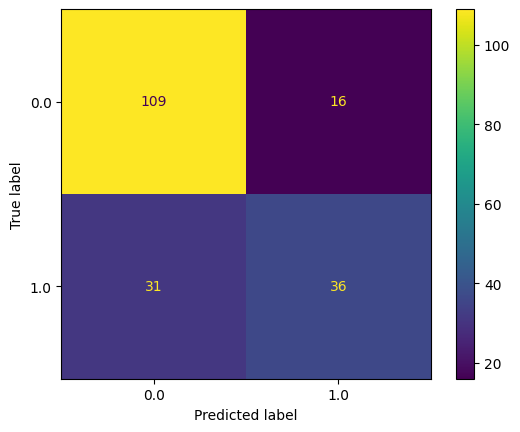

In [ ]:
#Importing library for confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#Confusion Matrix
diabetes_matrix = confusion_matrix(y_test, logit_pred)

#Dataframe of confusion matrix
diabetes_df = pd.DataFrame(diabetes_matrix, columns = ['Predicted Non-diabetic', 'Predicted Diabetic'], index=['True Non-Diabetic', 'True Diabetic'])

#Displaying dataframe
display(diabetes_df)

#Displaying confusion matrix
ConfusionMatrixDisplay.from_estimator(diabetes_logit, X_test, y_test);

True Positive: Correctly predicts that 36 people are diabetic.

False Positive: Incorrectly predicts that 16 people are diabetic.

True Negative: Correctly predicts that 109 people are non-diabetic.

False Negative: Incorrectly predicts that 31 people are non-diabetic.

In [ ]:
#Defining true and false positives
fp = diabetes_matrix[0, 1]

tp = diabetes_matrix[1, 1]

num_frauds = diabetes_matrix[1,:].sum()

#Checking how correctly the model predicts people with diabetes

print(f"{tp} patients were predicted correctly by the model out of {num_frauds} patients.")

36 patients were predicted correctly by the model out of 67 patients.


In [ ]:
#Printing ROC AUC score for grid logistic model
print("Best ROC_AUC score: ", grid_logit.best_score_)

Best ROC_AUC score:  0.8311967479674797


Decision Trees

,Predicted Non-diabetic,Predicted Diabetic
True Non-Diabetic,109,16
True Diabetic,31,36


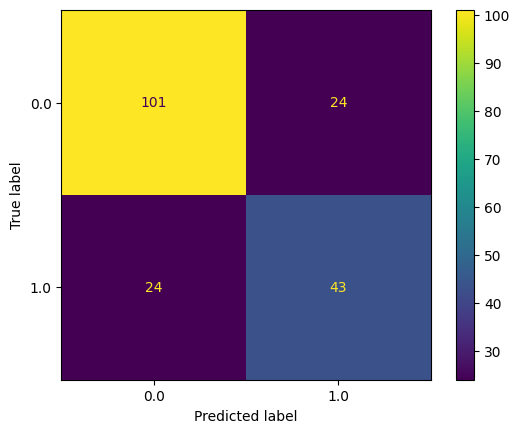

In [ ]:
#Confusion Matrix
diabetes_matrix = confusion_matrix(y_test, y_pred_best)

#Displaying dataframe
display(diabetes_df)

#Displaying confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test);

True Positive: Correctly predicts that 43 people are diabetic.

False Positive: Incorrectly predicts that 24 people are diabetic.

True Negative: Correctly predicts that 101 people are non-diabetic.

False Negative: Incorrectly predicts that 24 people are non-diabetic.

In [ ]:
#Defining true and false positives
fp = diabetes_matrix[0, 1]

tp = diabetes_matrix[1, 1]

num_frauds = diabetes_matrix[1,:].sum()

#Checking how correctly the model predicts people with diabetes
print(f"{tp} patients were predicted correctly by the model out of {num_frauds} patients.")

43 patients were predicted correctly by the model out of 67 patients.


In [ ]:
#ROC AUC score for grid decision trees
print("Best ROC AUC score: ", grid_model.best_score_)

Best ROC AUC score:  0.7205247376311844


In [ ]:
#Feature Importance of Decision Trees
grid_model.best_estimator_.feature_importances_
pd.Series(grid_model.best_estimator_.feature_importances_, index = X.columns).nlargest(8)

,0
Glucose,0.518842
Insulin,0.208320
BMI,0.122462
Age,0.068905
DiabetesPedigreeFunction,0.061657
Pregnancies,0.019813
SkinThickness,0.000000
BloodPressure,0.000000


Random Forests

,Predicted Non-diabetic,Predicted Diabetic
True Non-Diabetic,109,16
True Diabetic,31,36


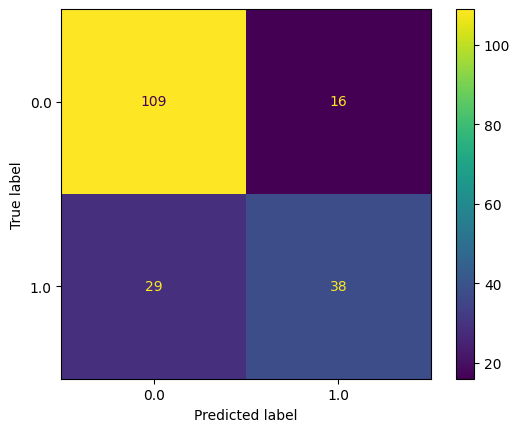

In [ ]:
#Confusion Matrix
diabetes_matrix = confusion_matrix(y_test, y_pred)

#Displaying dataframe
display(diabetes_df)

#Displaying confusion matrix
ConfusionMatrixDisplay.from_estimator(grid_forest, X_test, y_test);

True Positive: Correctly predicts that 38 people are diabetic.

False Positive: Incorrectly predicts that 16 people are diabetic.

True Negative: Correctly predicts that 109 people are non-diabetic.

False Negative: Incorrectly predicts that 29 people are non-diabetic.

In [ ]:
#Defining true and false positives
fp = diabetes_matrix[0, 1]

tp = diabetes_matrix[1, 1]

num_frauds = diabetes_matrix[1,:].sum()

#Checking how correctly the model predicts people with diabetes
print(f"{tp} patients were predicted correctly by the model out of {num_frauds} patients.")

38 patients were predicted correctly by the model out of 67 patients.


In [ ]:
#ROC AUC score for grid random forests
print("Best ROC_AUC score: ", grid_forest.best_score_)

Best ROC_AUC score:  0.8436455284552846


In [ ]:
#Feature Importance of Random Forest
grid_forest.best_estimator_.feature_importances_
pd.Series(grid_forest.best_estimator_.feature_importances_, index = X.columns).nlargest(8)

,0
Glucose,0.283177
Insulin,0.226660
Age,0.148501
BMI,0.125748
SkinThickness,0.091715
DiabetesPedigreeFunction,0.053567
Pregnancies,0.049326
BloodPressure,0.021305


Model Results Summary:

All three models nearly have the same accuracy score with random forest being the highest.

The logistic regression and random forest model nearly have the same ROC AUC score with decision trees having the lowest.

While the confusion matrix for the decision tree model 65% correctly predicts patients getting diabetes, it's not able to take features like SkinThickness and blood pressure into consideration as seen from the feature importance table.

Also, the classification report shows that the precision for both classes are imbalanced which is pretty risky for diagnosing a disease.

On the other hand, random forests takes all features into consideration and it's classification report shows that the precision for both classes are balanced.

Therefore, the best model to use is random forest as it's the highest in accuracy, ROC AUC score, and the precision for both classes are balanced.


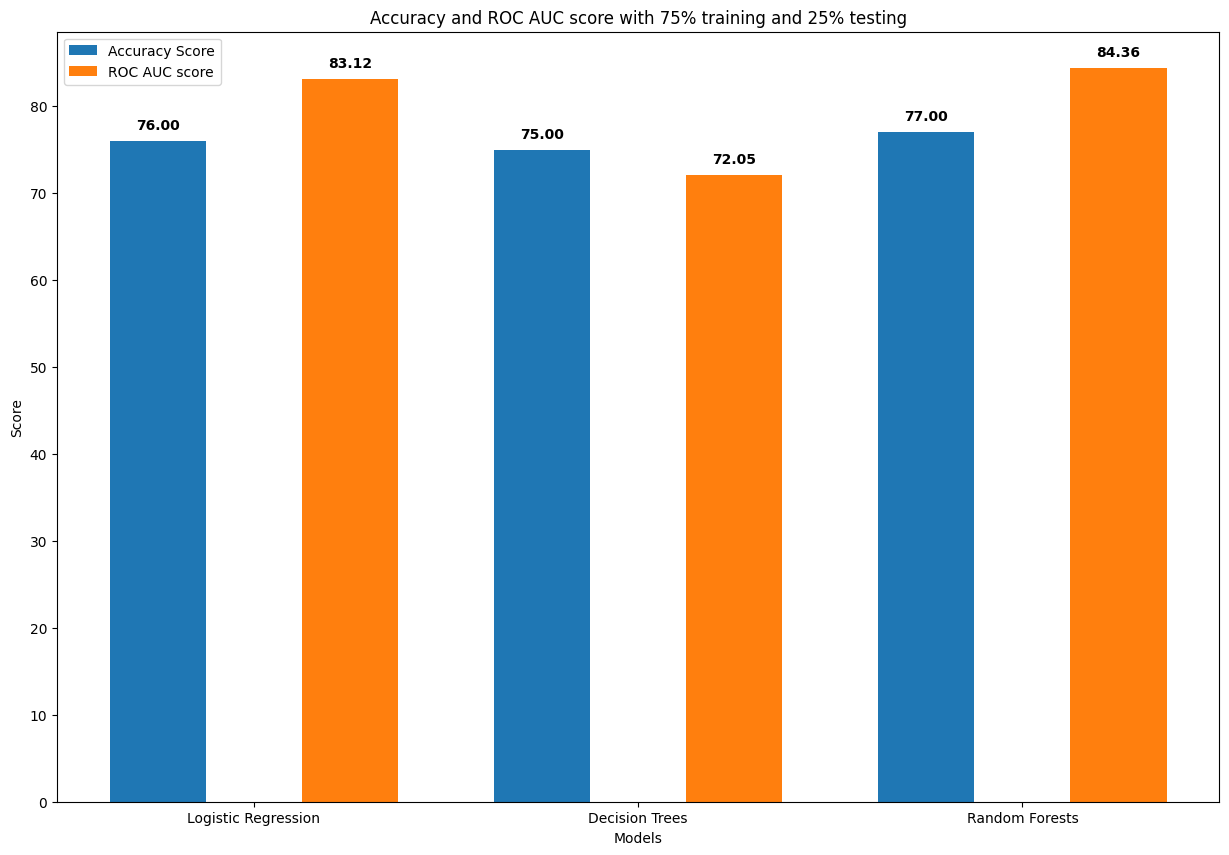

In [ ]:
#Defining models and accuracy score array
models = ['Logistic Regression', 'Decision Trees', 'Random Forests']
accuracy_score = [76, 75, 77]
roc_auc = [83.12, 72.05, 84.36]

#Parameters
x = np.arange(len(models))
width = 0.25

#Plotting bar
plt.figure(figsize=(15,10))
bars1 = plt.bar(x - width, accuracy_score, width=width, label = 'Accuracy Score')
bars2 = plt.bar(x + width, roc_auc, width=width, label = 'ROC AUC score')
plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Accuracy and ROC AUC score with 75% training and 25% testing')
plt.xticks(x, models)
plt.legend()

#Adding values to each bar
def add_labels(bars):
  for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height:.2f}', ha = 'center', va = 'bottom', weight ='bold')

add_labels(bars1)
add_labels(bars2)

plt.show()
